In [ ]:
#1.数据集展示
import pandas as pd

# 读取数据集
df1 = pd.read_csv('guangzhou_air_daily.csv')
df2 = pd.read_csv('guangzhou_industry_monthly.csv')
df3 = pd.read_csv('guangzhou_meteo_daily.csv')
df4 = pd.read_csv('guangzhou_time_features.csv')
df5 = pd.read_csv('guangzhou_traffic_daily.csv')

print('数据基本信息：')

df1.info()
# 查看数据集行数和列数
print('数据前几行内容信息：')
print(df1.head().to_csv(sep='\t', na_rep='nan'))

df2.info()
# 查看数据集行数和列数
print('数据前几行内容信息：')
print(df2.head().to_csv(sep='\t', na_rep='nan'))

df3.info()
# 查看数据集行数和列数
print('数据前几行内容信息：')
print(df3.head().to_csv(sep='\t', na_rep='nan'))
    
df4.info()
# 查看数据集行数和列数
print('数据前几行内容信息：')
print(df4.head().to_csv(sep='\t', na_rep='nan'))    

df5.info()
# 查看数据集行数和列数
print('数据前几行内容信息：')
print(df5.head().to_csv(sep='\t', na_rep='nan'))        

In [ ]:
#2.缺失值处理与异常值处理
import os
import pandas as pd
import numpy as np

# 定义文件路径
file_path = './'

# 遍历所有文件
for file_name in os.listdir(file_path):
    if file_name.endswith('.csv'):
        file_full_path = os.path.join(file_path, file_name)
        
        # 读取数据集
        df = pd.read_csv(file_full_path)

        print(f'文件{file_name}的基本信息：')
        df.info()

        # 查看数据集行数和列数
        rows, columns = df.shape

        if rows < 100 and columns < 20:
            # 短表数据（行数少于100且列数少于20）查看全量数据信息
            print(f'文件{file_name}的全部内容信息：')
            print(df.to_csv(sep='\t', na_rep='nan'))
        else:
            # 长表数据查看数据前几行信息
            print(f'文件{file_name}的前几行内容信息：')
            print(df.head().to_csv(sep='\t', na_rep='nan'))

        # 处理缺失值，使用均值填充
        numeric_cols = df.select_dtypes(include='number').columns
        for col in numeric_cols:
            df[col].fillna(df[col].mean(), inplace=True)

        # 处理异常值，使用 Z-Score 法
        for col in numeric_cols:
            mean = np.mean(df[col])
            std = np.std(df[col])
            z_scores = np.abs((df[col] - mean) / std)
            df = df[z_scores <= 3]

        # 将处理后的数据保存为新文件
        new_file_name = file_name.rsplit('.', 1)[0] + '_processed.csv'
        new_file_path = os.path.join(file_path, new_file_name)
        df.to_csv(new_file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6573 entries, 0 to 6572
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6573 non-null   object 
 1   station_id    6573 non-null   object 
 2   station_name  6573 non-null   object 
 3   area_type     6573 non-null   object 
 4   PM2_5         6573 non-null   float64
 5   PM10          6573 non-null   float64
 6   NO2           6573 non-null   float64
 7   O3            6573 non-null   float64
 8   AQI           6573 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 462.3+ KB


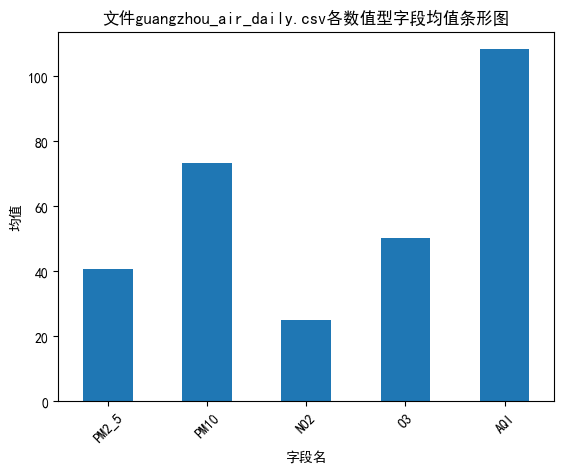

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year_month          288 non-null    object
 1   industry_type       288 non-null    object
 2   SO2_emission        288 non-null    int64 
 3   NOx_emission        288 non-null    int64 
 4   energy_consumption  288 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.4+ KB


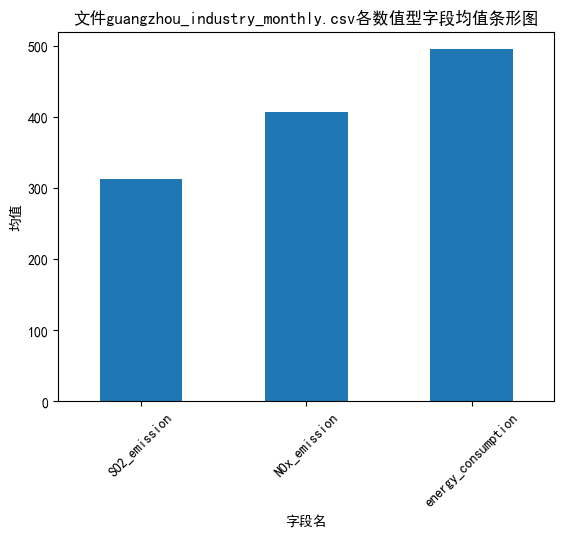

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2191 non-null   object 
 1   avg_temp        2191 non-null   float64
 2   max_temp        2191 non-null   float64
 3   min_temp        2191 non-null   float64
 4   humidity        2191 non-null   int64  
 5   wind_speed      2191 non-null   float64
 6   precipitation   2191 non-null   float64
 7   sunshine_hours  2191 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 137.1+ KB


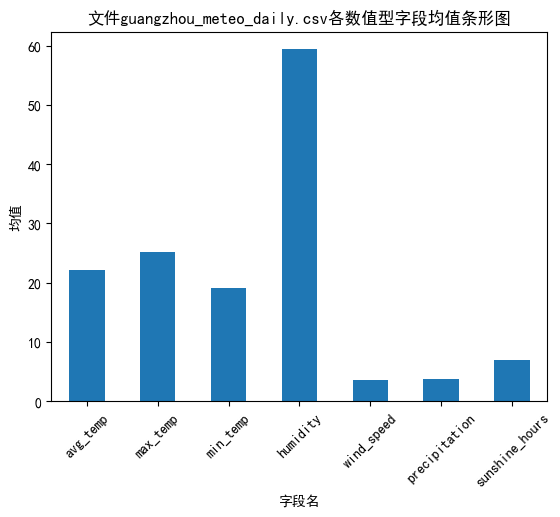

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2191 non-null   object
 1   year         2191 non-null   int64 
 2   month        2191 non-null   int64 
 3   day          2191 non-null   int64 
 4   day_of_week  2191 non-null   int64 
 5   is_weekend   2191 non-null   int64 
 6   is_holiday   2191 non-null   int64 
 7   season       2191 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 137.1+ KB


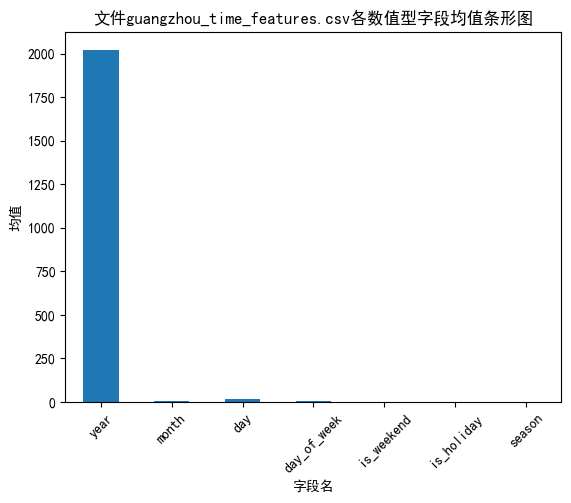

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2191 non-null   object 
 1   traffic_volume    2191 non-null   int64  
 2   congestion_index  2191 non-null   float64
 3   accidents         2191 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 68.6+ KB


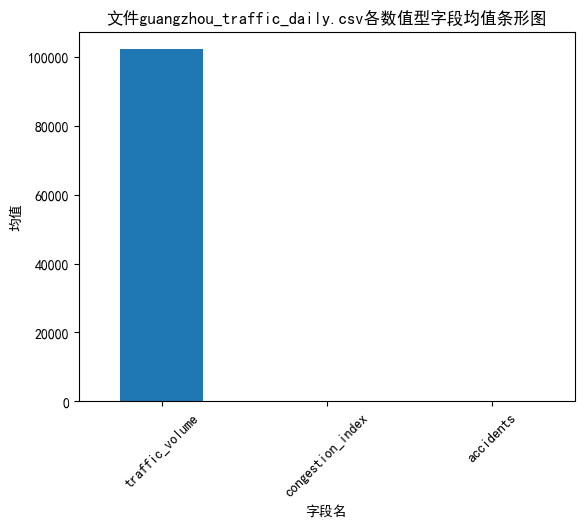

In [ ]:
#3.1数据集可视化
import os
import pandas as pd
import matplotlib.pyplot as plt

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei"]

# 定义文件路径
file_path = './'

# 遍历所有文件
for file_name in os.listdir(file_path):
    if file_name.endswith('.csv'):
        file_full_path = os.path.join(file_path, file_name)
        
        # 读取数据集
        df = pd.read_csv(file_full_path)
        df.info()

        # 查看数据集行数和列数
        rows, columns = df.shape

        # 处理缺失值，这里采用填充均值的方法
        numeric_cols = df.select_dtypes(include='number').columns
        
        # 绘制条形图，这里以数值型字段的均值为例
        if not numeric_cols.empty:
            means = df[numeric_cols].mean()
            means.plot(kind='bar')
            plt.title(f'文件{file_name}各数值型字段均值条形图')
            plt.xlabel('字段名')
            plt.ylabel('均值')
            plt.xticks(rotation=45)
            plt.show()

In [ ]:
#3.2数据集交互可视化
import os
import pandas as pd
import plotly.graph_objects as go

# 定义文件路径
file_path = './'

# 遍历所有文件 
for file_name in os.listdir(file_path):
    if file_name.endswith('.csv'):
        file_full_path = os.path.join(file_path, file_name)

        # 读取数据集
        df = pd.read_csv(file_full_path)

        # 获取数值型列
        numeric_cols = df.select_dtypes(include='number').columns

        if not numeric_cols.empty:
            # 计算数值型列的均值
            means = df[numeric_cols].mean()

            # 创建条形图
            fig = go.Figure(data=[go.Bar(
                x=means.index,
                y=means.values
            )])

            # 设置图表布局，包括标题、轴标签和图表大小（宽 200 像素、高 300 像素）
            fig.update_layout(
                title=f'文件{file_name}各数值型字段均值条形图',
                xaxis_title='字段名',
                yaxis_title='均值',
                xaxis_tickangle=45,
                width=500,
                height=300
            )

            # 显示图形
            fig.show()